
***Геометрическое распределение***

Дискретная СВ $\xi$ имеет геометрическое распределение, если ее возможные значения: $1, 2, 3, 4,...$, а вероятности этих значений:
$$
\label{eq:1}
    p_k = P({\xi_k = k}) = q^{k-1}p, \text{ где } k=1,2,3... 
$$
Примеры: число выстрелов до первого попадания, число испытаний прибора до первого отказа, число бросания монеты до первого выпадения решки и т.д.
$$
\begin{array}{|c|c|с|c|}\label{}
\hline k   & 1 & 2  & 3    & ... &n&...& \\\hline
 P(\xi = k)  & p & qp & q^2p & ... &q^{n-1}p&...& \\\hline
\end{array}
$$

$
\Phi_\xi(z)=\sum\limits_{k=0}^{\infty}pq^{k-1}z^k = pz\sum\limits_{k=0}^{\infty}(qz)^{k-1} = pz\frac{1-(qz)^{k-1}}{1-qz}
\Rightarrow \lim\limits_{k\to\infty}{pz\frac{1-(qz)^{k-1}}{1-qz}}=\frac{pz}{1-qz}, \text{при условии, что } |qz|<1  \Rightarrow \Phi_\xi'(z) = \frac{p}{(1-qz)^2} \Rightarrow \Phi_\xi'(1) = \frac{p}{(1-q)^2} = \frac{1}{p} \\
\Phi_\xi''(z) = \frac{2pq}{(1-qz)^3} \Rightarrow 
    \Phi_\xi''(1) = \frac{2q}{p^2} \Rightarrow \\
D_\xi=\Phi_\xi''(1)+\Phi_\xi'(1)-(\Phi_\xi'(1))^2=
    \frac{2q}{p^2} + \frac{1}{p} - \frac{1}{p^2} = \frac{2q+p-1}{p^2}=
        \frac{q}{p^2}
$


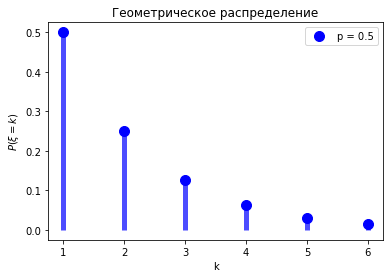

In [71]:
import matplotlib.pyplot as plt
p, q, n = .5, 1-p, 7
kk = list(range(1, n))
dstr = []

for k in kk:
    dstr.append(q**(k-1)*p)
    
plt.vlines(kk, 0, dstr, color='b', lw=5, alpha=0.7)
plt.plot(kk, dstr, 'bo', ms=10, label=f'p = {p}')
plt.title('Геометрическое распределение')
plt.xlabel('k')
plt.ylabel(r'$P(\xi=k)$')
plt.legend()
plt.show()

In [33]:
import scipy.stats as sts

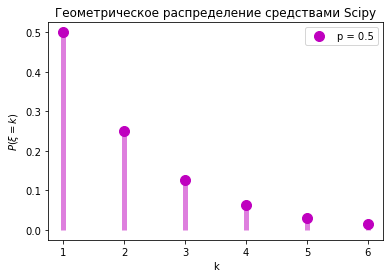

In [76]:
# plt.plot(kk, sts.geom(p).pmf(kk), label=f'p = {p}')
plt.title('Геометрическое распределение средствами Scipy')
plt.vlines(kk, 0, sts.geom(p).pmf(kk), color='m', lw=5, alpha=0.5)
plt.plot(kk, dstr, 'mo', ms=10, label=f'p = {p}')

plt.xlabel('k')
plt.ylabel(r'$P(\xi=k)$')
plt.legend()
plt.show()

***Пример.*** Два орудия залпом, но при независимой наводке, стреляют в цель до первого попадания хотя бы одним орудием. Вероятность попадания в цель первым орудием при одном выстреле равна 0,2, вторым – 0,3. Найти:
<ol>
    <li>Закон распределения числа $\xi$ сделанных залпов.</li>
    <li>$P(\xi \gt 2)$</li>
    <li>$E_\xi$</li>
</ol>

Вероятность попадания хотя бы одним выстрелом равна $p=1-q_1q_2=1-0.8\cdot0.7=0.44$

In [77]:
p1, p2 = .2, .3
q1, q2 = 1-p1, 1-p2
p = p1*p2+p1*q2+p2*q1 
p = round(p, 2)
q = 1-p

n = 7
kk = list(range(1, n))
dstr = []
for k in kk:
    dstr.append(q**(k-1)*p)
print([round(i, 3) for i in dstr])

[0.44, 0.246, 0.138, 0.077, 0.043, 0.024]


$P(\xi>2) = 1 - P(\xi \leq 2)$

In [106]:
p_ = 1 - sum(dstr[:2])
print('Вероятность того, что хотя бы одно орудие', end='')
print(' попадет в цель только с третьей или более попытки равна', p_)

Вероятность того, что хотя бы одно орудие попадет в цель только с третьей или более попытки равна 0.3136


In [108]:
rv = sts.geom(p=p)
rv.sf(2)

0.3136

$E_\xi = \frac{1}{p} \approx 2.2727$